<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/HW4_sDaniels/Hw4_MCMC_Shar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
np.random.seed(42)

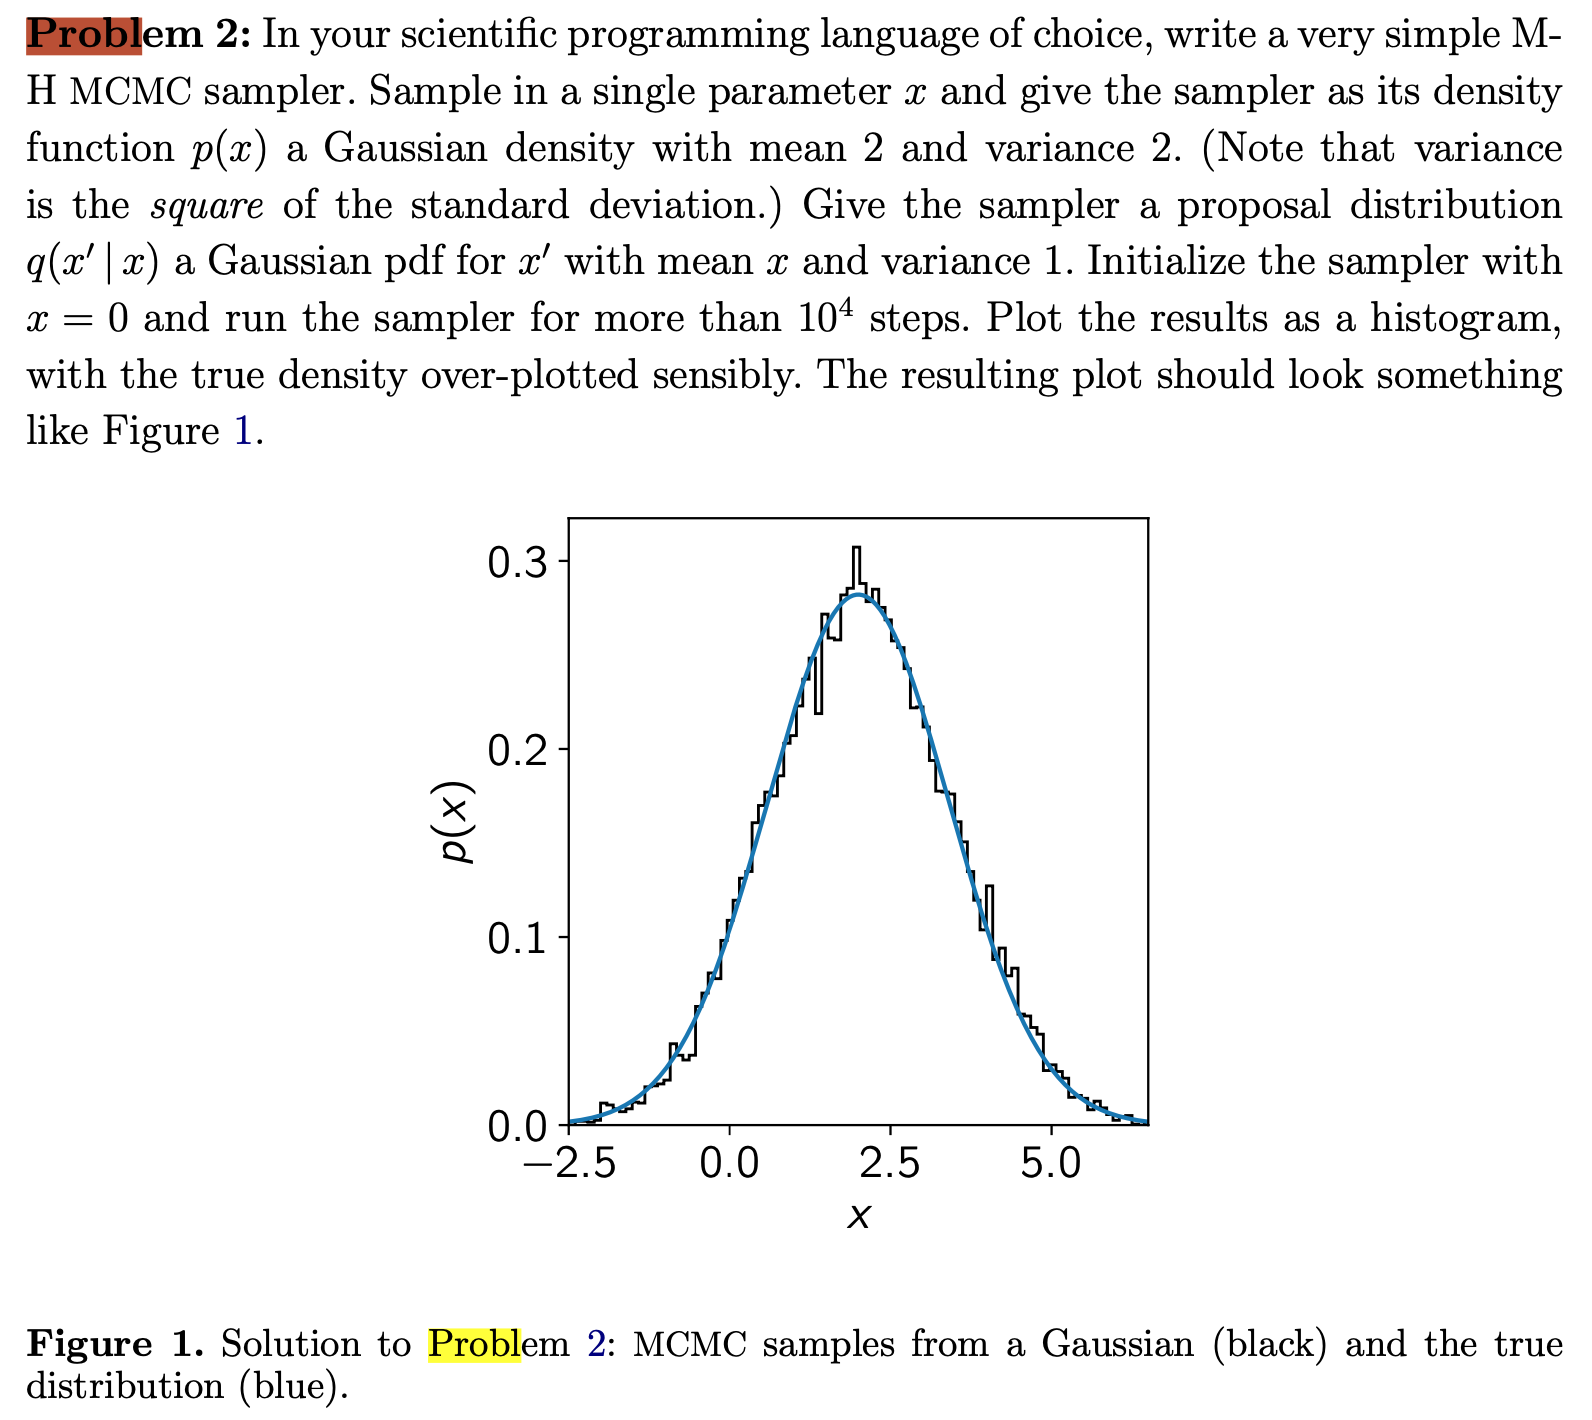

In [18]:
x = np.linspace(-2.5, 6.5, 100000)
#pdf
p = sp.stats.norm.pdf(x, loc=2, scale=np.sqrt(2))

Text(0, 0.5, 'p(x)')

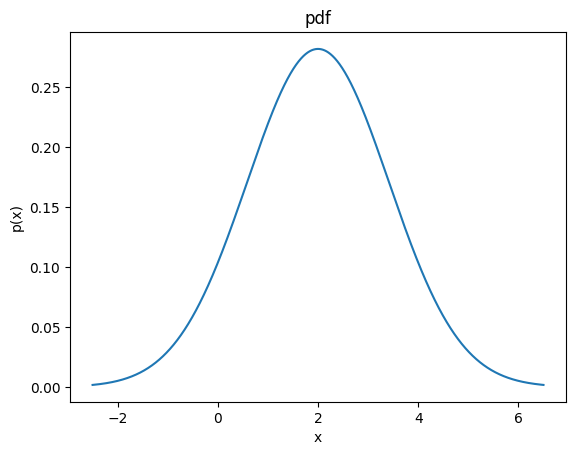

In [49]:
plt.plot(x, p)
plt.title("pdf")
plt.xlabel("x")
plt.ylabel("p(x)")

Figure 1: making sure my pdf looks gaussian and correct. it does.

In [27]:
#proposal distribution q
def q(x):
  """
  drawing from the proposal pdf
  takes x and x prime and returns a pdf on xp with mean x
  """
  return sp.stats.norm.rvs(loc=x, scale=1)

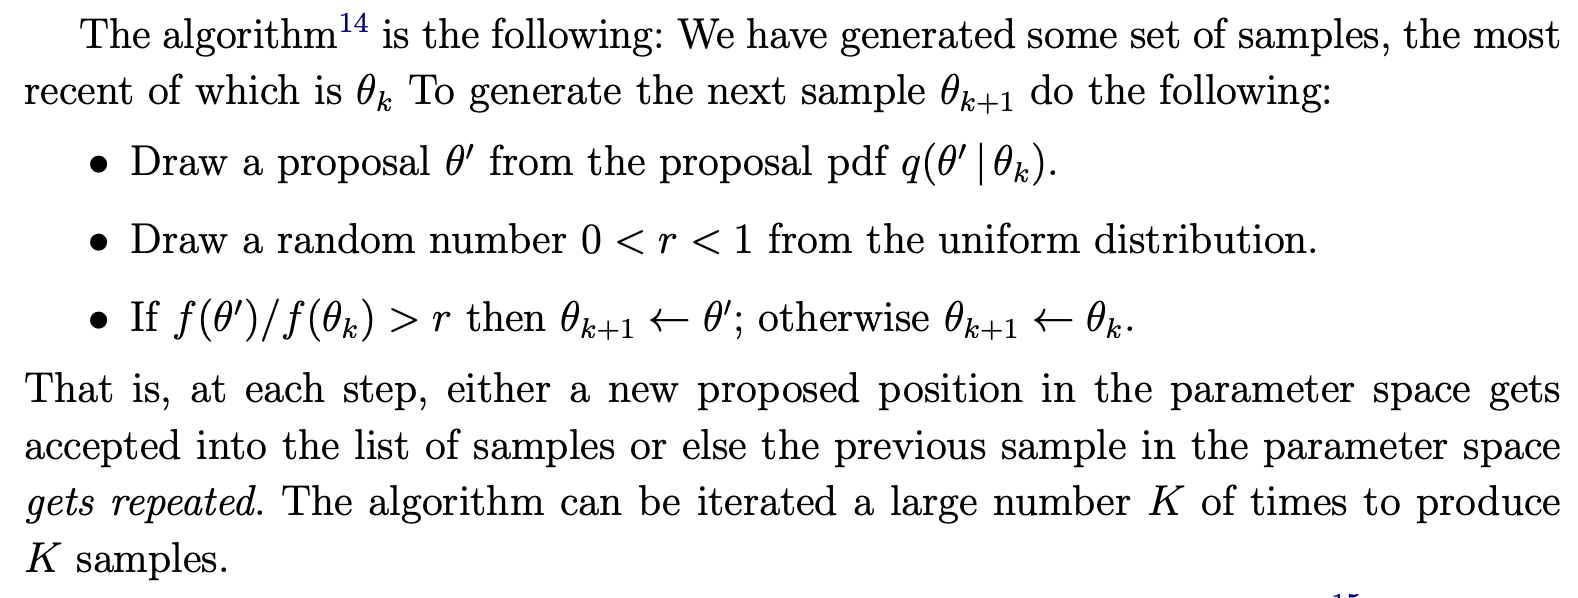

In [37]:
def mcmc_step(tk, accepted_samples):
  '''
  function for one mcmc step
  inputs:
  tk: the most recent sample
  accepted_samples: list of accepted samples
  returns a sample (the same or a new one), and adds sample to list if it is accepted
  '''
  #draw a proposal tp from q
  tp = q(tk)
  #random number between 0 and 1 (excluding those)
  r = np.random.uniform()
  while r==0: #just in case it is zero, since that is technically a possibility
    r = np.random.uniform()
  #determine whether f(tp)/f(tk)>r, where f is our density function pdf from earlier
  ftp = sp.stats.norm.pdf(tp, loc=2, scale=np.sqrt(2))
  ftk = sp.stats.norm.pdf(tk, loc=2, scale=np.sqrt(2))
  ratio = ftp/ftk
  #loc=2, scale=np.sqrt(2))
  if ratio>r:
    tknext = tp
    accepted_samples.append(tp)
  else:
    tknext = tk
  return tknext, accepted_samples

In [41]:
mcmc_step(.2, [1.2805152848065264])

(0.7977204669126083, [1.2805152848065264, 0.7977204669126083])

In [58]:
#let's try it
accepted_samples = []
tk=0
for i in tqdm(range(50000)):
  tk, accepted_samples = mcmc_step(tk, accepted_samples)

  0%|          | 0/50000 [00:00<?, ?it/s]

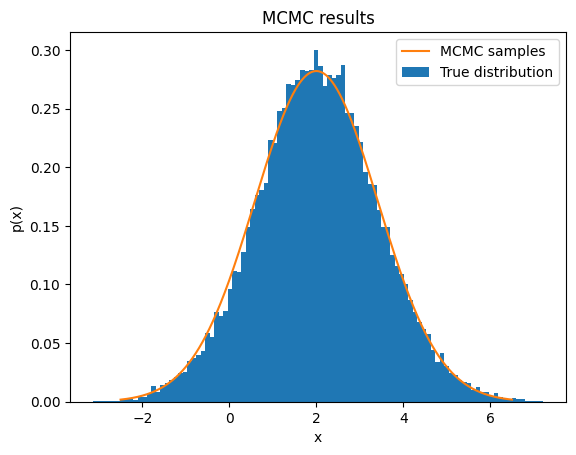

In [59]:
plt.hist(accepted_samples, bins=100, density=True) #the density=True normalizes it
plt.plot(x, p)
plt.title("MCMC results")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(["MCMC samples", "True distribution"])
plt.show()

Figure 2: Here we can see the results of our MCMC sampler. The distribution of samples does match up with the density function that it was sampling. Success!